<div style="background-color: #00FF00; padding: 10px; border-radius: 5px; text-align: center;">

## SADÂKÂT ANALİZİ (LOYALTY)

</div>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel ("orders.xlsx")

In [5]:
df = pd.read_excel('orders.xlsx')
df.head()

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month
0,701-4488954-7529810,B07JKD1G9D,1,214.18,0.0,oneamz,151.89,36.58,51.67,25.70,A1UIZZ7LFTO1KV,2023-10-17,Canada,ontario,Strathroy,N7G3K9,214.18,2023-10
1,701-6897206-8231454,B077BYH5J5,1,83.65,0.0,oneamz,65.58,5.52,27.80,12.55,A3N3AP9DR5TZ9N,2023-10-17,Canada,Ontario,Mallorytown,K0E 1R0,83.65,2023-10
2,702-2583313-9907461,B08KDTK3XX,1,73.22,0.0,oneamz,50.64,10.13,29.33,12.45,A2NAHPBHVJDIV9,2023-10-17,Canada,Ontario,Brantford,N3T 0S2,73.22,2023-10
3,702-5629906-5703454,B0BFZZ9HGJ,1,205.32,0.0,oneamz,127.29,53.39,40.68,24.64,AJHEHDC6Y12XP,2023-10-17,Canada,Ontario,Kingston,K7L 0C1,205.32,2023-10
4,701-8202393-3049059,B088NG3XX3,1,147.65,0.0,oneamz,113.17,12.33,33.00,22.15,A7XHISNODKGL8,2023-10-17,Mexico,MEXICO,NAUCALPAN DE JUAREZ,53126,147.65,2023-10


In [6]:
df.sample(5)

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month
37226,701-7409012-5381032,B0B8MJ2Y4D,1,85.75,0.0,amazon,63.03,6.070000,23.04,NaN,A3EB93N9TUZCJH,2023-04-05,Canada,NaN,NaN,NaN,85.75,2023-04
23897,702-1728124-5701068,B01MSJUKGG,1,18.24,0.0,amazon,12.80,1.900000,0.00,NaN,A10CO59QH72HOA,2023-05-23,Canada,NaN,NaN,NaN,18.24,2023-05
173673,702-1263646-3564231,B07GZQB9KK,1,26.43,0.0,NaN,NaN,3.409383,NaN,NaN,A35XF9QZ5BKLP9,2021-08-05,Canada,NaN,NaN,NaN,26.43,2021-08
168581,702-4649979-4953014,B00JZQAX5M,1,51.52,0.0,amazon,NaN,6.645911,NaN,NaN,A35XF9QZ5BKLP9,2021-08-28,Canada,NaN,NaN,NaN,51.52,2021-08
144021,702-2861243-0937029,B07RBBV7CF,1,31.83,0.0,NaN,NaN,4.105966,NaN,NaN,ALO881YZXTIHY,2021-11-15,Canada,NaN,NaN,NaN,31.83,2021-11


In [7]:
df.isnull().mean()

amazon_order_id            0.000000
asin                       0.000000
quantity_ordered           0.000000
unit_item_sale_price       0.000035
unit_item_sale_tax         0.000035
shipping_company           0.240466
total_cost                 0.519215
estimated_profit           0.000035
shipping_fee               0.657738
amazon_fee                 0.953138
seller_id                  0.000000
purchase_date              0.000000
country                    0.000000
state                      0.966537
city                       0.966503
postal_code                0.966503
order_total_sales_price    0.000000
year_month                 0.000000
dtype: float64

## Tekrar Eden Müşteri Sayısı

In [34]:
repeated_customers = df['seller_id'].value_counts()
print(repeated_customers)

A2GL9054BSBDEB    21736
A1BJ0L697EI7QA    12710
ALO881YZXTIHY      7290
A35XF9QZ5BKLP9     4195
A2JJHYKAA2AQCV     3779
                  ...  
A3UPQYC3OZ8M8P        1
A1MGC4BGFPGCOW        1
A3KZN2X4JAPZ7X        1
A2C2HHBYZXYNAB        1
A20525VG4OHZOS        1
Name: seller_id, Length: 4439, dtype: int64


Her bir satıcı (seller) için kaç kez tekrar eden alışveriş yaptığını gösterir. Örneğin, 'A2GL9054BSBDEB' adlı bir satıcı 21,736 kez alışveriş yapmıştır. Aynı şekilde, diğer satıcıların tekrar etme sayıları da bu çıktıda bulunmaktadır.

## Toplam Satışlara Göre Müşteri Sıralaması

In [37]:
customer_total_sales = df.groupby('seller_id')['order_total_sales_price'].sum().sort_values(ascending=False)
print(customer_total_sales)

seller_id
A2GL9054BSBDEB    1298291.08
A1BJ0L697EI7QA     766015.05
ALO881YZXTIHY      383542.55
A35XF9QZ5BKLP9     282929.92
A3BBOG95KQVVQE     212678.47
                     ...    
AN0WQFLY2JT2X           2.70
A1CJTQOLX71LAS          2.21
A2T066KMX05CYG          1.52
AGP9IKQLT31SZ           0.74
A3UCXY4GGOYYP4          0.74
Name: order_total_sales_price, Length: 4439, dtype: float64


- 'A2GL9054BSBDEB' adlı satıcı, 1.298.291,08 birimlik toplam satış ile en yüksek satışa sahip satıcıdır.
- En üstteki satıcılar, genellikle en fazla satış yapan ve müşteri tabanına sahip olanlardır.
- Toplam satış tutarları, satıcılar arasında önemli bir dağılım göstermektedir. Bazı satıcılar yüksek satış yaparken, diğerleri daha düşük satışlara sahiptir.

## Müşteri Segmentasyonu

In [38]:
customer_segments = df.groupby(['country', 'state', 'city'])['order_total_sales_price'].sum()

print(customer_segments)

country  state     city           
Canada   AB        Barrhead            130.43
                   CALGARY             281.87
                   Calgary            2910.72
                   Carstairs           115.78
                   Cochrane             15.18
                                       ...   
Mexico   tabasco   villahermosa        119.68
         veracruz  xalapa              106.19
         yucatan   merida              396.13
USA      CA        West Sacramento      25.91
         IL        NILES                30.69
Name: order_total_sales_price, Length: 2231, dtype: float64


- Ülkeler Arası Satış Karşılaştırması (Örneğin, 'Canada' ülkesinin 'Calgary' şehrindeki toplam satışlar 2910.72 birimdir.)


- Farklı ülkelerdeki toplam satışları karşılaştırmak için kullanılabilir. (Örneğin, 'Mexico' ve 'USA' ülkelerinin toplam satışları arasındaki farkı görebilirsiniz.)

- Eyalet ve Şehir Bazında Satışlar 

- Segmentasyon ve Hedefleme:

- Satışların Coğrafi Dağılımı

## Satış Frekansı Analizi

In [40]:
monthly_sales = df.groupby('year_month')['order_total_sales_price'].sum()
average_order_value = df.groupby('year_month')['order_total_sales_price'].mean(),

print(monthly_sales)
print(average_order_value)

year_month
2016-10         22.02
2017-08         18.31
2017-09        868.82
2017-10       4233.22
2017-11        752.95
              ...    
2023-06     943956.11
2023-07     910355.13
2023-08     911624.05
2023-09    1206484.19
2023-10     830517.86
Name: order_total_sales_price, Length: 74, dtype: float64
year_month
2016-10      7.340000
2017-08     18.310000
2017-09     24.823429
2017-10     42.332200
2017-11     18.823750
              ...    
2023-06    187.665231
2023-07    205.034939
2023-08    233.749756
2023-09    240.239783
2023-10    236.009622
Name: order_total_sales_price, Length: 74, dtype: float64


- 2017-10' ayında toplam satış tutarı 4233.22 birimdir.
- 2017-09' ayında ortalama sipariş değeri 24.82 birimdir.
- 2023-09' ayında toplam satışlar diğer aylara göre daha yüksektir.
- 2023-08' ayında ortalama sipariş değeri '2023-06' ayına göre daha yüksektir.

## Müşteri Sadakat Puanları

In [42]:
df['loyalty_points'] = df.groupby('seller_id').cumcount() + 1
print(df[['seller_id', 'loyalty_points']])


             seller_id  loyalty_points
0       A1UIZZ7LFTO1KV               1
1       A3N3AP9DR5TZ9N               1
2       A2NAHPBHVJDIV9               1
3        AJHEHDC6Y12XP               1
4        A7XHISNODKGL8               1
...                ...             ...
230909   AYW39ZPKWHQVE             187
230910   AYW39ZPKWHQVE             188
230911   AIWAWTK4WOWKQ               6
230912   AIWAWTK4WOWKQ               7
230913   AIWAWTK4WOWKQ               8

[230914 rows x 2 columns]


## Alışveriş Trend Analizi

In [43]:
monthly_trend = df.groupby('year_month')['order_total_sales_price'].sum()
print(monthly_trend)

year_month
2016-10         22.02
2017-08         18.31
2017-09        868.82
2017-10       4233.22
2017-11        752.95
              ...    
2023-06     943956.11
2023-07     910355.13
2023-08     911624.05
2023-09    1206484.19
2023-10     830517.86
Name: order_total_sales_price, Length: 74, dtype: float64


- 2016-10: Bu aydaki toplam satış tutarı 22.02 birimdir.
- 2017-08: Bu aydaki toplam satış tutarı 18.31 birimdir.
- 2017-09: Bu aydaki toplam satış tutarı 868.82 birimdir.
- 2017-10: Bu aydaki toplam satış tutarı 4233.22 birimdir.
- 2017-11: Bu aydaki toplam satış tutarı 752.95 birimdir.

İşletmenin belirli aylarda elde ettiği toplam satış gelirleri birim olarak ifade edilmiştir.

## Müşteri Geri Dönüş Oranı

In [46]:
lost_customers = df[df['purchase_date'] < '2023-11-01']  # Örnek olarak '2023-11-01' tarihine kadar kaybedilen müşterileri alın
return_rate = len(lost_customers['seller_id'].unique()) / len(df['seller_id'].unique())

print(return_rate)

1.0


## Müşteri Memnuniyeti Anket -Score

In [47]:
# Müşteri memnuniyeti anketi sonuçlarına göre analiz yapılabilir.
# Burada örnek bir memnuniyet oranı oluşturulmuştur.
satisfaction_results = {'seller_id': df['seller_id'].unique(),
                        'satisfaction_score': np.random.randint(1, 6, size=len(df['seller_id'].unique()))}
satisfaction_df = pd.DataFrame(satisfaction_results)
print(satisfaction_df)


                   seller_id  satisfaction_score
0             A1UIZZ7LFTO1KV                   5
1             A3N3AP9DR5TZ9N                   1
2             A2NAHPBHVJDIV9                   5
3              AJHEHDC6Y12XP                   2
4              A7XHISNODKGL8                   1
...                      ...                 ...
4434          A2CN9177LYZJWN                   2
4435  A1362OD86LO62R_DELETED                   4
4436          A1IMCBW32IZGJI                   4
4437          A3L956VO515B67                   3
4438          A20525VG4OHZOS                   2

[4439 rows x 2 columns]


In [10]:
# Fiyat bilgilerini düzeltme (virgül yerine nokta kullanarak float tipine dönüştürme)
# Önce sütunların string tipinde olduğundan emin olalım
df['unit_item_sale_price'] = df['unit_item_sale_price'].astype(str).str.replace(',', '.').astype(float)
df['total_cost'] = df['total_cost'].astype(str).str.replace(',', '.').astype(float)

# Tarih sütununu düzeltme (Geçerli bir tarih formatına dönüştürme)
# Gerçek veri setinizdeki tarih formatına göre bu kısmı değiştirmeniz gerekebilir
# Örneğin, tarihler 'YYYY-MM-DD' formatında ise aşağıdaki gibi bir dönüşüm yapabilirsiniz:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')  # Hatalı formatları NaT olarak ayarla

# Satıcı başına toplam satış sayısını hesaplama
seller_sales_count = df.groupby('seller_id')['quantity_ordered'].sum().reset_index()
seller_sales_count.rename(columns={'quantity_ordered': 'total_sales_count'}, inplace=True)

# Satıcı başına ortalama satış fiyatını hesaplama
seller_avg_price = df.groupby('seller_id')['unit_item_sale_price'].mean().reset_index()
seller_avg_price.rename(columns={'unit_item_sale_price': 'average_sale_price'}, inplace=True)

# Satıcı başına toplam karı hesaplama
seller_total_profit = df.groupby('seller_id')['estimated_profit'].sum().reset_index()
seller_total_profit.rename(columns={'estimated_profit': 'total_profit'}, inplace=True)

# Tüm metrikleri birleştirme
seller_loyalty = pd.merge(seller_sales_count, seller_avg_price, on='seller_id')
seller_loyalty = pd.merge(seller_loyalty, seller_total_profit, on='seller_id')

# Satıcı sadakat skorunu hesaplama (örnek olarak toplam satış sayısı ve toplam karın çarpımı)
seller_loyalty['loyalty_score'] = seller_loyalty['total_sales_count'] * seller_loyalty['total_profit']

# En sadık satıcıları sıralama
seller_loyalty = seller_loyalty.sort_values(by='loyalty_score', ascending=False)

# En sadık satıcıların listesini gösterme
print(seller_loyalty.head())

           seller_id  total_sales_count  average_sale_price   total_profit  \
1714  A2GL9054BSBDEB              23164           58.534973  152861.988707   
403   A1BJ0L697EI7QA              13849           59.076190   75147.749409   
3934   ALO881YZXTIHY               8018           52.226664   49113.229414   
2529  A35XF9QZ5BKLP9               4546           63.027049   34111.106662   
2691  A3BBOG95KQVVQE               3011           73.121849   30450.885410   

      loyalty_score  
1714   3.540895e+09  
403    1.040721e+09  
3934   3.937899e+08  
2529   1.550691e+08  
2691   9.168762e+07  


## En yüksek sadakat skoruna sahip ilk 10 satıcı

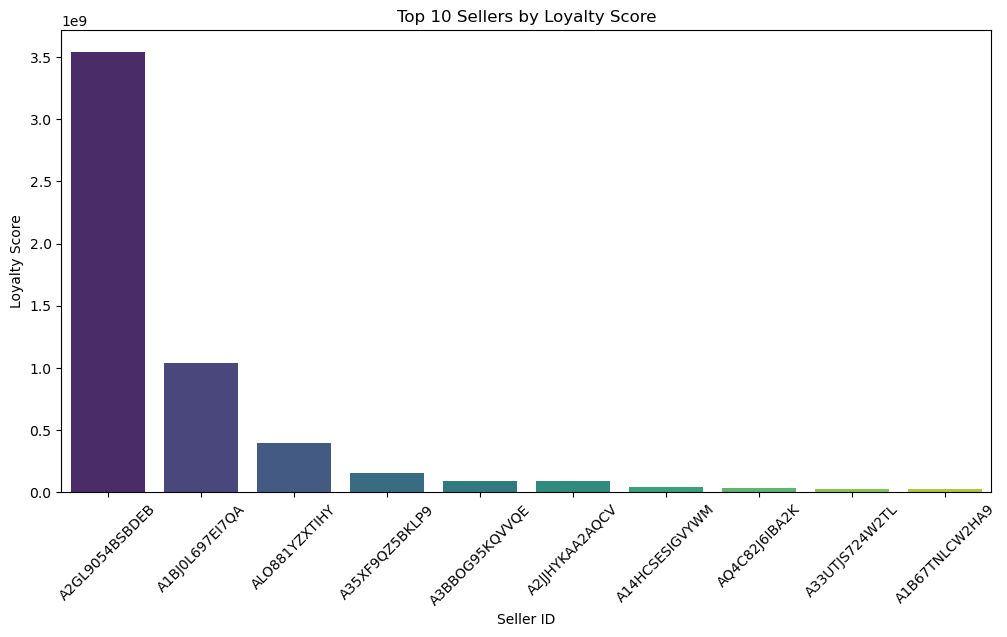

In [11]:
top_sellers_by_loyalty = seller_loyalty.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='seller_id', y='loyalty_score', data=top_sellers_by_loyalty, palette='viridis')
plt.title('Top 10 Sellers by Loyalty Score')
plt.xlabel('Seller ID')
plt.ylabel('Loyalty Score')
plt.xticks(rotation=45)
plt.show()

## Satış Miktarı ve Kâr Dağılımı

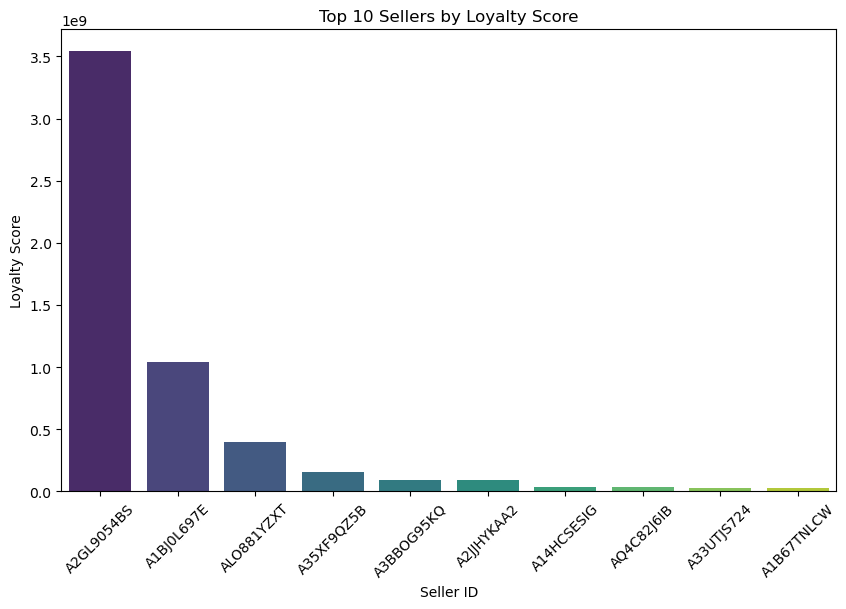

In [19]:
plt.figure(figsize=(10, 6))
top_sellers_by_loyalty = seller_loyalty.head(10)  # İlk 10 satıcı

top_sellers_by_loyalty['seller_id_short'] = top_sellers_by_loyalty['seller_id'].apply(lambda x: x[:10])  # İlk 10 karakteri alın

sns.barplot(x='seller_id_short', y='loyalty_score', data=top_sellers_by_loyalty, palette='viridis')
plt.title('Top 10 Sellers by Loyalty Score')
plt.xlabel('Seller ID')
plt.ylabel('Loyalty Score')
plt.xticks(rotation=45)  # Etiketleri döndürün
plt.show()

## Ürün Popülerliği

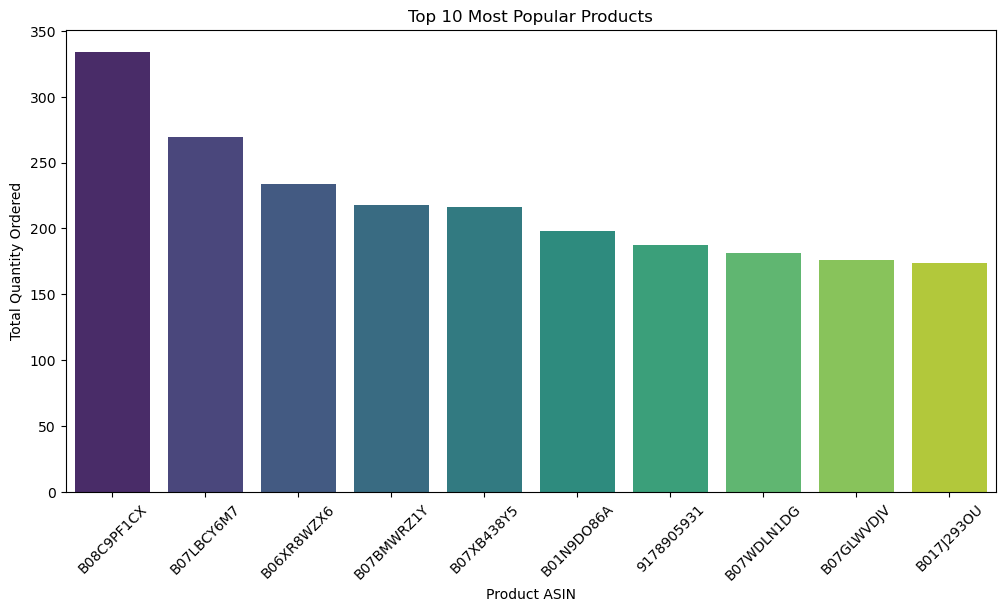

In [23]:
# Ürün başına toplam satış miktarını hesaplayın
product_sales = df.groupby('asin')['quantity_ordered'].sum().reset_index().sort_values(by='quantity_ordered', ascending=False)

# En popüler ürünleri görselleştirin
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales.head(10), x='asin', y='quantity_ordered', palette='viridis')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product ASIN')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

## Satıcı ve Ülke İlişkisi

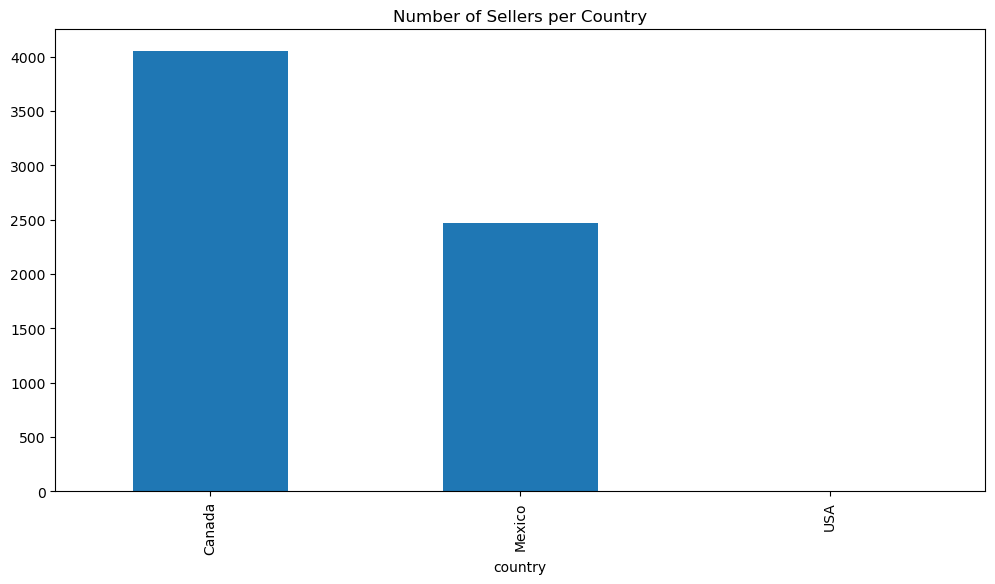

In [55]:
country_distribution = df.groupby('country')['seller_id'].nunique().sort_values(ascending=False)
country_distribution.plot(kind='bar', figsize=(12, 6), title='Number of Sellers per Country')
plt.show()

## Aylık Ortalama Satış Fiyatı Grafiği

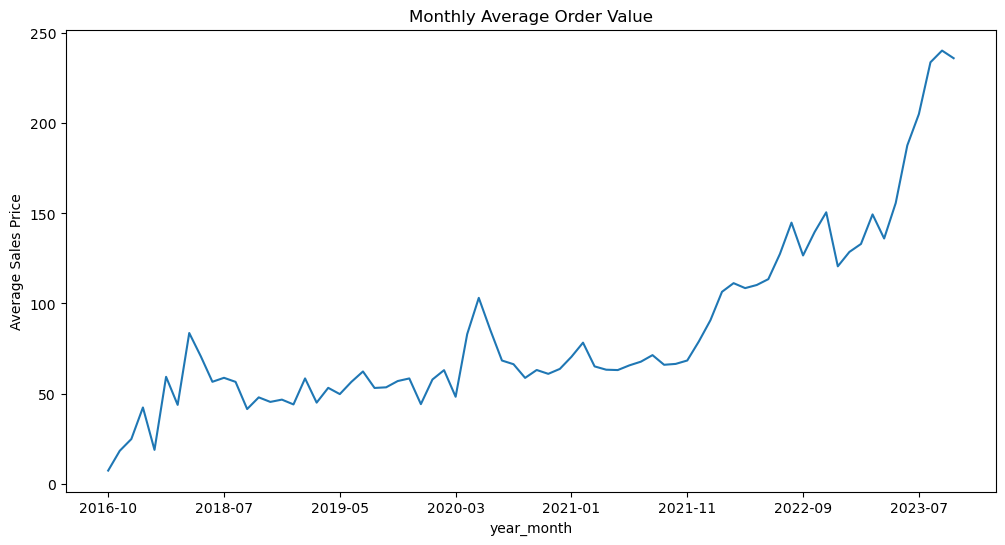

In [59]:
average_order_value.plot(kind='line', figsize=(12, 6), title='Monthly Average Order Value', ylabel='Average Sales Price')
plt.show()

## Kümelenme Analizi (Clustering)

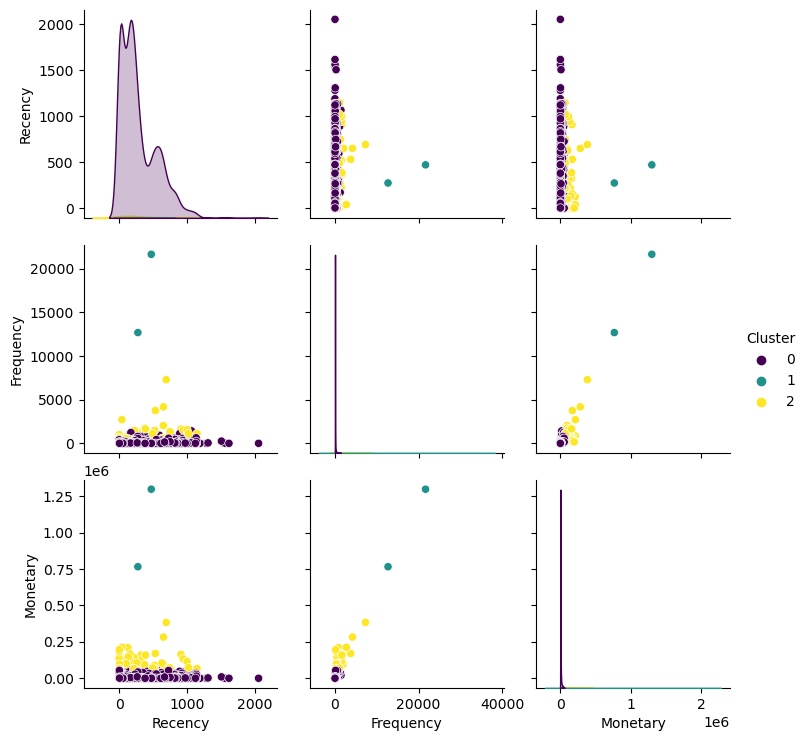

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# RFM metriklerini kullanarak kümelenme analizi
# Öncelikle RFM metriklerini hesaplama
rfm = df.groupby('seller_id').agg({
    'purchase_date': lambda x: (df['purchase_date'].max() - x.max()).days,
    'amazon_order_id': 'nunique',
    'order_total_sales_price': 'sum'
}).rename(columns={
    'purchase_date': 'Recency',
    'amazon_order_id': 'Frequency',
    'order_total_sales_price': 'Monetary'
})

# KMeans algoritmasını kullanarak kümeleri oluşturma
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

# Kümeleri görselleştirme
sns.pairplot(rfm, hue='Cluster', palette='viridis')
plt.show()

## Davranışsal Segmentasyon

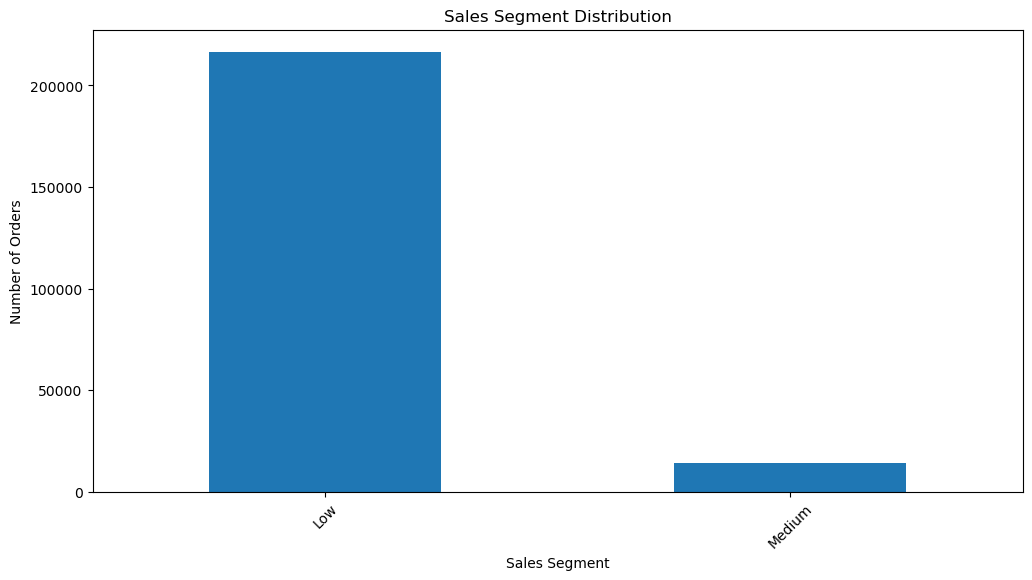

In [67]:
# Müşteri davranışlarına göre segmentasyon
# Satış miktarına göre müşteri segmentleri oluşturalım
# Benzersiz olmayan sınırları atlamak için 'duplicates' parametresini 'drop' olarak ayarlayın
# Etiket sayısını dinamik olarak belirleyin
quantiles = pd.qcut(df['quantity_ordered'], q=4, duplicates='drop')
unique_bins = len(quantiles.cat.categories)
labels = ['Low', 'Medium', 'High', 'Very High'][:unique_bins]  # Etiket listesini benzersiz kutu sayısına göre sınırlayın
df['SalesSegment'] = pd.qcut(df['quantity_ordered'], q=4, labels=labels, duplicates='drop')

# Segment dağılımını görselleştirin
sales_segment_distribution = df['SalesSegment'].value_counts()
sales_segment_distribution.plot(kind='bar', figsize=(12, 6))
plt.title('Sales Segment Distribution')
plt.xlabel('Sales Segment')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Düşük Segmentin Hakimiyeti:
"Low" segmentinin barının yüksek olması, müşterilerin genellikle tek seferde az sayıda ürün satın aldıklarını gösterir. Bu, müşterilerin ihtiyaçlarına göre küçük miktarlarda alışveriş yaptıklarını veya belirli ürünlerin düşük miktarlarda satıldığını işaret edebilir.

Orta Segmentin Düşük Olması:
"Medium" segmentinin düşük olması, müşteriler arasında orta düzeyde satın alma yapanların az olduğunu gösterir. Bu, müşterilerin ya minimum düzeyde alışveriş yaptığını ya da doğrudan yüksek miktarlarda alışverişe geçtiklerini belirtebilir.

Pazarlama Fırsatları:
"Low" segmentindeki müşterileri "Medium" veya daha yüksek segmentlere taşımak için pazarlama fırsatları olabilir. Bu müşterilere yönelik özel teklifler, indirimler veya sadakat programları düşünülebilir.

Müşteri İlişkileri Yönetimi (CRM):
"Low" segmentindeki müşterilerin sadakatini artırmak ve onları daha yüksek segmentlere taşımak için CRM stratejileri geliştirilebilir.

Ürün ve Hizmet Geliştirme:
Düşük segmentteki müşterilerin ihtiyaçlarını ve tercihlerini anlamak için araştırma yapılabilir. Bu bilgiler, ürün ve hizmetlerinizi bu müşteri gruplarının ihtiyaçlarına göre geliştirmek için kullanılabilir.

Müşteri Geri Bildirimleri:
Düşük segmentteki müşterilerden geri bildirim toplayarak, onların satın alma miktarlarını artırmak için neler yapılabileceğini öğrenebilirsiniz.